## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Цель исследования

Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Описание столбцов в датасете

   - `Name` — название игры
   - `Platform` — платформа
   - `Year_of_Release` — год выпуска
   - `Genre` — жанр игры
   - `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
   - `EU_sales` — продажи в Европе (миллионы проданных копий)
   - `JP_sales` — продажи в Японии (миллионы проданных копий)
   - `Other_sales` — продажи в других странах (миллионы проданных копий)
   - `Critic_Score` — оценка критиков (максимум 100)
   - `User_Score` — оценка пользователей (максимум 10)
   - `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)

## Структура проекта

[Шаг 1. Чтение данных и первичный анализ](#s1p1)
   - [Вывод по общей информации в датафрейме](#s1p2)
   
[Шаг 2. Предобработка данных](#s2p1)
   - [2.1 Переименование столбцов](#s2p2)
   - [2.2 Работа с пропусками и типами данных столбцов](#s2p3)
   - [2.3 Поиск дубликатов](#s2p4)
   - [2.4 Добавление новых столбцов](#s2p5)
   - [2.5 Вывод по предобработке данных](#s2p6)
   
[Шаг 3: Исследовательский анализ данных](#s3p1)
   - [3.1 Сколько игр выпускалось в разные годы](#s3p2)
   - [3.2 Продажи по платформам](#s3p3)
   - [3.3 Характерный срок появления и исчезновения платформ](#s3p4)
   - [3.4 Актуальный период](#s3p5)
   - [3.5 Какие платформы лидируют по продажам, растут или падают?](#s3p6)
   - [3.6 Влияние отзывов пользователей и критиков на продажи популярных платформ](#s3p7)
   - [3.7 Какие жанры игр являются наиболее прибыльными?](#s3p8)
   
   
   
[Шаг 4. Портрет пользователя каждого региона](#s4p1)
   - [4.1 Самые популярные платформы по регионам](#s4p2)
   - [4.2 Самые популярные жанры по регионам](#s4p3)
   - [4.3 Игры с каким рейтингом лидируют в регионах](#s4p4)

[Шаг 5. Проверка гипотез](#s5p1)
   - [5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#s5p2)
   - [5.2 Средние пользовательские рейтинги жанров Action и Sports разные](#s5p3)

[Шаг 6: Общий вывод](#s6p1)

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats as st
import warnings 

<a id="s1p1"></a>
## Шаг 1. Чтение данных и первичный анализ

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
# посмотрим на первые 10 столбцов в датафрейме
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# выведем основную информацию о датасете
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


<a id="s1p2"></a>
### Вывод по общей информации в датафрейме

Предварительные выводы по основной информации о датафрейме:
   - названия столбцов с большой буквы, в шаге **Предобработка данных** приведем все названия в нижний регистр
   - тип данных в столбце `Year_of_Release` указан как **object**, в предобработке переведем в целочисленный формат
   - в столбцах есть пропуски, на шаге предобработки данных будем изучать каждый столбец отдельно
   - столбец `User_Score` предполагает количественный формат, но указан как **object**, что не есть правильно
   - столбец `Critic_Score` также выглядит как целое число записанное в формате **float64**, нужно изменить

<a id="s2p1"></a>
## Шаг 2. Предобработка данных

<a id="s2p2"></a>
### 2.1 Переименование столбцов

Ранее в предварительном анализе заметил, что названия столбцов начинаются с заглавной буквы, необходимо привести все названия в нижний регистр.

In [5]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<a id="s2p3"></a>
### 2.2 Работа с пропусками и типами данных столбцов

In [6]:
# функция для отображения количества пропусков и доли пропусков от количества данных
def percent_of_nan(df):
    nan_sum = df.isnull().sum(axis = 0).sort_values(ascending = False)
    nan_percent = (nan_sum / len(df))*100
    new_frame = {'Число пропусков': nan_sum, 'Процент пропусков': nan_percent}
    dataframe = pd.DataFrame(new_frame).sort_values(by = 'Процент пропусков', ascending = False).round(2)
    return dataframe

percent_of_nan(data)

,Число пропусков,Процент пропусков
critic_score,8578,51.32
rating,6766,40.48
user_score,6701,40.09
year_of_release,269,1.61
name,2,0.01
genre,2,0.01
platform,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00


1. Проверим 2 пропуска в столбце `name` 

In [7]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


2 пропущенных значения в наименовании игры, также соответствуют 2 пропускам в жанре игр. 
Судя по году выпуска игр это старые игры на сегу, возможно, игры были не очень популярны и не были оценены.
Такие данные невозможно будет заполнить вручную и они составляют менее 1% от общего числа, поэтому эти строки будут удалены из датафрейма.

In [8]:
data = data.dropna(subset = ['name'])

2. Так как в столбце есть пропуски, необходимо будет в первую очередь решить проблему с ними.
Так как доля пропусков в столбце всего **1.61%**, поэтому считаю, что мы можем удалить строки с пропусками.

In [9]:
data = data.dropna(subset = ['year_of_release'])

3. Ранее в исследовании данных обнаружили несоответствующий тип данных в столбце `user_score`, посмотрим на уникальные значения столбца для проверки.

In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим, что все оценки представляют из себя вещественное число, также присутствуют пропуски и одно единственное текстовое значение **'tbd'**. 

Аббревиатура **TBD** расшифровывается как `to be determinate` - то есть оценка еще не определена. Возможно оценки пользователей просто отсутствуют ввиду отсутствия популярности игры или годом выпуска. 

Посмотрим, что это за строки:

In [11]:
print(len(data.query('user_score == "tbd"')))

2376


Ввиду невозможности заполнить такие данные вручную, предлагаю заменить эти данные на пропуски и заменить тип данных на **float64**

In [12]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.NaN

4. Посмотрим на значения в столбце `raiting`

**Entertainment Software Rating Board (ESRB)** — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»). К началу 2003 года рейтинги ESRB получили более 8000 продуктов от 350 издателей.

`EC — Early Childhood` «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры; Устаревшая градация.

`E — Everyone` «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально K-A ("Kids to Adults");

`E10+ — Everyone 10+` «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови;

`T — Teen` «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики;

`M — Mature` «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории;

`AO — Adults Only` Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением;

`RP — Rating Pending` Рейтинг ожидается.

Таким образом значение рейтинга K-A и EC меняем на E.

In [13]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'
data.loc[data['rating'] == 'EC', 'rating'] = 'E'

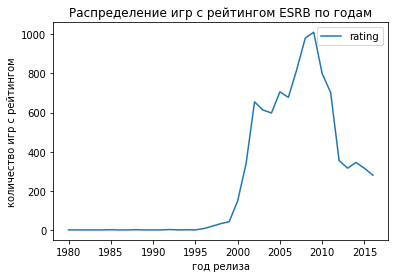

In [14]:
plots = data.groupby('year_of_release')['rating'].count().reset_index().plot(x='year_of_release')
plt.xlabel('год релиза')
plt.ylabel('количество игр с рейтингом')
plt.title('Распределение игр с рейтингом ESRB по годам')
plt.show()

С учетом того, что ESRB была основана в 1994 году, а выгрузке присутствуют игры с 1980 года, можно предположить, что отсутствие рейтинга - это нормально. Заполним пустые значения строкой "unrated" как игры не получившие рейтинг от организации.

In [15]:
data['rating'] = data['rating'].fillna('unrated')

4. Столбец `critic_score` также представляет интерес, посмотрим на него поближе.

In [16]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Оценки критиков представляют собой целые значения по 100-бальной шкале. 

Переведем тип данных в целочисленный, а также тип данных в столбце `date` указан как float64, хотя данные по году выпуска игры не могут быть вещественным числом. Поэтому можем перевести формат в целочисленный формат (int).

In [17]:
# переводим типы данных в указанных столбцах 
data = data.astype({'year_of_release' : 'Int64', 'critic_score' : 'Int64', 'user_score' : 'float64'})
data.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score         float64
rating              object
dtype: object

Преобразовали все столцбы, которые отметили ранее, можем продолжать предобработку.

In [18]:
percent_of_nan(data)

,Число пропусков,Процент пропусков
user_score,8981,54.62
critic_score,8461,51.45
name,0,0.00
platform,0,0.00
year_of_release,0,0.00
genre,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00
other_sales,0,0.00


Остается внушительное количество пропусков в оценках критиков и пользователей. Но в данном случае будет некорректно заполнять их медианой или средним, так как всё-таки эти показатели индивидуальны для каждой игры и не зависят от жанра или чего-либо еще. Мы не можем решать за пользователя или критика, это исказит всю картину. 

<a id="s2p4"></a>
### 2.3 Поиск дубликатов

In [19]:
# Проверим записи на наличие дубликатов
print('Количество явных дубликатов во всем датафрейме:', data.duplicated().sum())

Количество явных дубликатов во всем датафрейме: 0


Явные дубликаты отсутствуют, но предполагаю, что в названиях игр могут скрываться неявные дубликаты. Необходимо будет посмотреть на данные внимательнее

In [20]:
data['name'].value_counts()

Need for Speed: Most Wanted                       12
FIFA 14                                            9
LEGO Marvel Super Heroes                           9
Ratatouille                                        9
Madden NFL 08                                      8
                                                  ..
Dramatic Dungeon: Sakura Wars - Kimi Arugatame     1
The Conveni: Ano Machi wo Dokusen Seyo             1
Robotica                                           1
Hatsune Miku and Future Stars: Project Mirai       1
Ghost Trick: Phantom Detective                     1
Name: name, Length: 11426, dtype: int64

In [21]:
data[data['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,<NA>,NaN,unrated
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,<NA>,NaN,unrated
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,<NA>,NaN,unrated
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45,6.1,E


На примере игры Need for Speed: Most Wanted мы видим, что неявные дубликаты тем не менее различны по платформам и году выпуска, а также имеют различные оценки от пользователей и критиков. Поэтому для адекватного анализа данных такие данные следует оставить в изначальном виде.

In [22]:
# Комментарий ревьюера 2
temp = data.copy()
temp[temp[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E


<a id="s2p5"></a>
### 2.4 Добавление новых столбцов

В данных представлены продажи по трем регионам: Северная Америка, Япония и Европа, а также продажи в других странах. Создадим отдельный столбец в датафрейме, где будет информация о суммарных продажах игры во всех регионах.

In [23]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,unrated,31.38


**Предположение о появления пропусков и дальнейшие действия с ними:**

- Пропуски в столбцах `name` и`genre` скорее всего вызваны тем, что эти 2 пропуска игры 1993 года выпуска, возможно информация о них отсутствует;
- Пропуски в столбцах оценок критиков и пользователей возможно вызваны тем, что многие игры не оценивались ранее и просто не имеют оценок ввиду позднего выхода игры на рынок. Возможно игра просто не была оценена критиками. Было бы неправильно заполнить рейтинг игры средним или медианой, даже если бы мы их считали внутри для каждого жанра отдельно;
- столбец `rating` - рейтинг от ESRB, ассоциации, определяющей возрастной рейтинг компьютерных игр, пропуски в связи с тем, что многие игры вышли до появления рейтинга;

<a id="s2p6"></a>
### 2.5 Вывод по предобработке данных

**Вывод после предобработки данных:**

- привели регистр названий столбцов к нижнему;
- преобразовали типы данных в следующих столбцах:
    - `year` - на целочисленный (int);
    - `user_score` - на вещественный (float);
    - `critic_score` - на целочисленный (int);
- обработали пропуски:
    - удалили пропуски в тех строках, где невозможно подставить значения медианой или средним. Такие данные составляли около 1% данных, поэтому мы их удалили;
    - заменили значения "tbd" на Nan для работы со столбцом `user_score` для дальнейшей работы, в связи с невозможностью заполнить либо удалить эти пропуски;
    - пропуски в столбцах с оценками игроков и критиков нет возможности заполнить какими либо данными, поэтому решено оставить эти пропуски, т.к. их доля в датасете превышает 50% всех данных;
    - пропуски в столбце `raiting` были заменены на "unrated" так как многие игры вышли до основания организации;
- явные дубликаты отсутствуют;\
- добавлен новый столбец `total_sales` с общей суммой продаж по всему миру;

In [24]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

<a id="s3p1"></a>
## Шаг 3: Исследовательский анализ данных

Перед началом исследовательского анализа даннных посмотрим на описание данных датафрейма

In [25]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


Есть игры с рекордно большими продажами, при том что 75% игр не дотягивают до таких цифр. Необходимо внимательно посмотреть на цифры продаж в разных регионах.

<a id="s3p2"></a>
### 3.1 Сколько игр выпускалось в разные годы

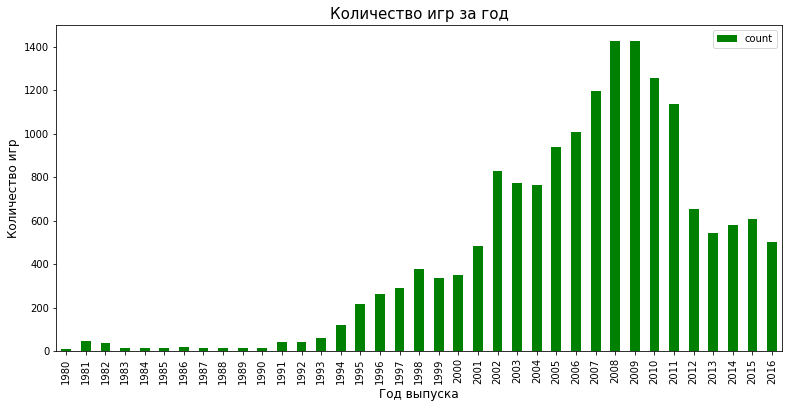

In [26]:
game_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
game_year.columns = ['year_of_release', 'count']
game_year.plot.bar(x='year_of_release', y='count', figsize=(13,6), color='green')
plt.title('Количество игр за год', fontsize=15);
plt.xlabel('Год выпуска', fontsize=12);
plt.ylabel('Количество игр', fontsize=12);

Проанализирровав график, мы можем сделать следующие выводы:

- до 1994 года выпускалось крайне мало игр
- пик количества выпущенных игр пришелся на 2008 и 2009 года
- после 2011 года можно наблюдать резкий спад

Появление новых платформ и их популярность привели к увеличению количества производимых игр. Основываясь на этом, мы будем использовать в исследовании только данные после 1994 года включительно.

<a id="s3p3"></a>
### 3.2 Изменение продаж по платформам

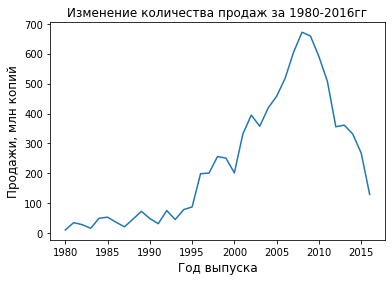

In [27]:
sns.lineplot(
    x='year_of_release', 
    y='total_sales', 
    data=data.groupby('year_of_release').agg({'total_sales': 'sum'}));
plt.title('Изменение количества продаж за 1980-2016гг');
plt.xlabel('Год выпуска', fontsize=12);
plt.ylabel('Продажи, млн копий', fontsize=12);

Пик по количеству выпущенных игр и по продажам приходится на 2007-2011 годы, а затем количество вместе с продажами начинают резко снижаться. Посмотрим, какие платформы представлены в данных.

In [28]:
data_top_platform = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
data_top_platform

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

Расположившаяся на первом месте PS2 была продана в количестве 157,68 млн штук с момента выпуска в 2000 году. Поддержка данной приставки была прекращена в декабре 2012 года в Японии и январе 2013 года в остальном мире.
Падение продаж может быть обосновано более новыми платформами и прекращением поддержки от производителя, который сосредоточился на продвижении новых продуктов.

Первое место по продажам занимает PS2, однако надо учитывать, что появилась она в 2000 году, на момент 2016 года уже представлены PS3 и PS4, по продажам они пока отстают, однако в топ-10 входят, связано это, скорее всего, с их более поздним появлением. 

Такая же ситуация и с Xbox 360 и One. В основном в топе представлены игры для PlayStation, Xbox, различные Nintendo (GBA, Wii, DS), а замыкают десятку лидеров игры на компьютер. Посмотрим, как менялись платформы в течение последних 10 лет и сколько примерно времени уходит на угасание популярности платформы и появление новой.

<a id="s3p4"></a>
### 3.3 Характерный срок появления и исчезновения платформ

Теперь посмотрим на динамику продаж игр на топовых платформах по годам.

Для начала, выделим названия ТОП 5 платформ, которые мы опредили ранее в список

In [29]:
data_top_platform.head(5)
top_platforms_condition = list(data_top_platform.head(5).index.values)

top_platforms_condition

['PS2', 'X360', 'PS3', 'Wii', 'DS']

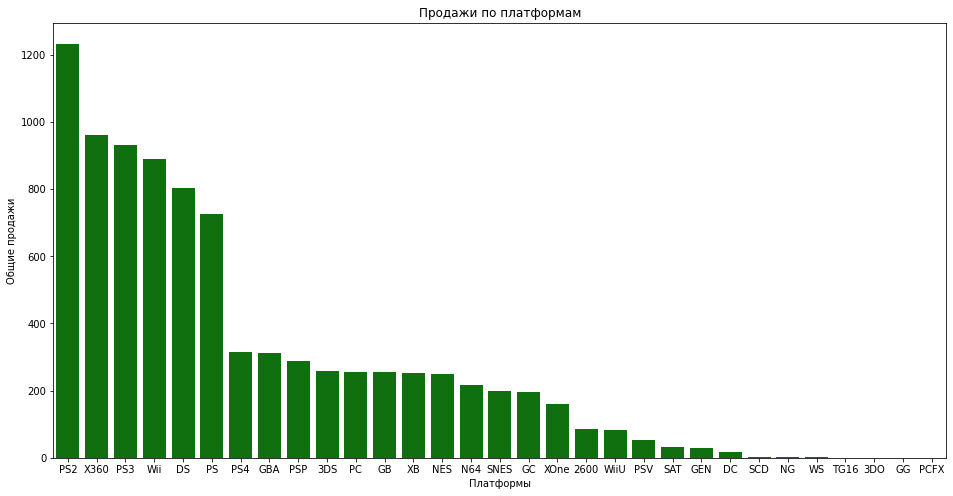

In [30]:
platform_sales = (
    data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)
plt.figure(figsize=(16, 8))
(sns.barplot(data = platform_sales, x = platform_sales.index, y = 'total_sales', color = 'green')
    .set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

PS2


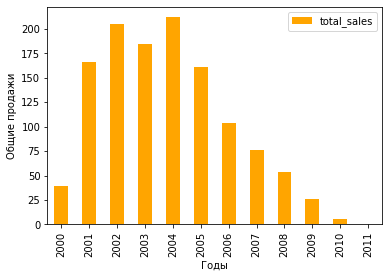

X360


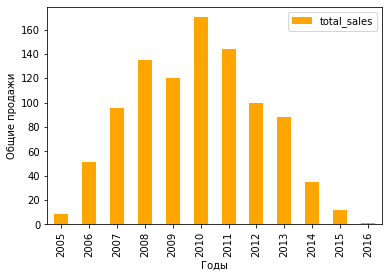

PS3


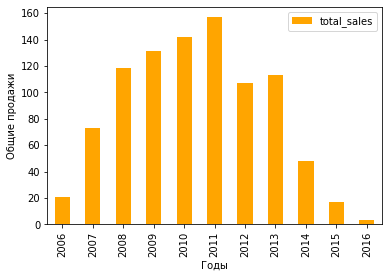

Wii


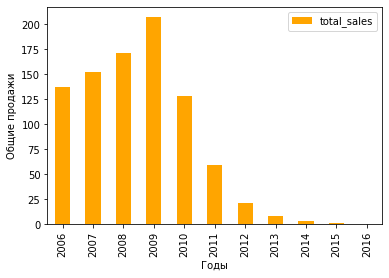

DS


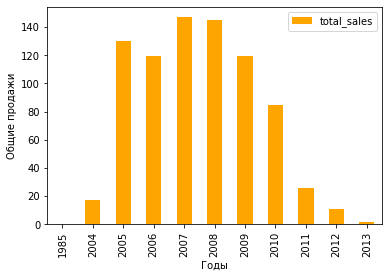

PS


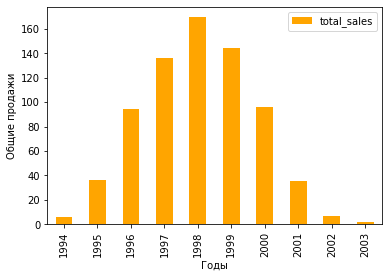

In [31]:
for platform in platform_sales.index[:6]:
    print(platform)
    (data
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar', color = 'orange', xlabel = 'Годы', ylabel = 'Общие продажи',)
    )
    plt.show()

In [32]:
# Комментарий ревьюера
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

На графике мы можем наблюдать жизненный цикл платформ:

- **PS2** - платформа появилась в 2000, достигла пика своей популярности в районе 2003 - 2005 годов, после чего, количество выпускаемых игр начало падать
- **X360** - платформа появилась в 2005 году, пик количества релизов пришелся на 2010 год
- **PS3** - Платформа появилась в 2005 году, пик популярности пришелся на 2010 год
- **Wii** - Появилась в 2005 году. Мы можем наблюдать, что на момент релиза, у платформы уже было достаточно много игр (больше 100), у все остальных платформ, на момент релиза было не более 50 доступных игр.
- **DS** - появилась в 2004 году, пик релизов пришелся на 2007 - 2008 годы. Прекратились релизы примерно в 2013 году

По расчету средний срок жизни платформы составляет 7 лет.

<a id="s3p5"></a>
### 3.4 Актуальный период

Опираясь на график из предыдущего анализа, можно сделать вывод, что актуальный период анализа начинается с 2006 года т.к. в среднем срок жизни одной платформы составляет 5 лет, для анализа возьмем меньший срок в 3 года.

Появление на рынке новой платформы PS4 говорит от том, что она просуществует 2-4 года и топ продаж для этой платформы ожидается на 2017 год. После падения суммарных продаж с 2013 года появилась тенденция к росту продаж игр за счет их качества, а не количества. Большинство студий разработчиков создают игры за 2-4 года, так что в 2017 попадут игры, разработка которых ведется с 2013 года. Хорошие игры на рынке продаются в течении нескольких лет.

Будем рассматривать данные с 2013 по 2016 годы.

In [33]:
# создадим датафрейм с актуальным периодом для дальнейшего анализа
actual_period_data = data.query('year_of_release >= 2013')

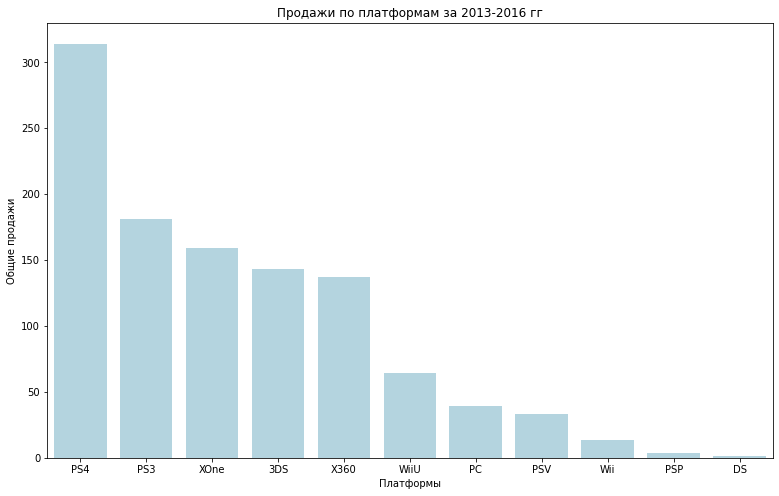

In [34]:
actual_platform_sales = (
    actual_period_data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)
plt.figure(figsize=(13, 8))
(sns.barplot(data = actual_platform_sales, x = actual_platform_sales.index, y = 'total_sales', color = 'lightblue')
    .set(title = 'Продажи по платформам за 2013-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

В актуальном периоде видим подавляющее преимущество PS4 перед конкурентами в части продаж

<a id="s3p6"></a>
### 3. 5 Какие платформы лидируют по продажам, растут или падают?

PS4


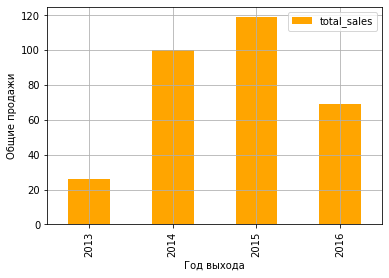

PS3


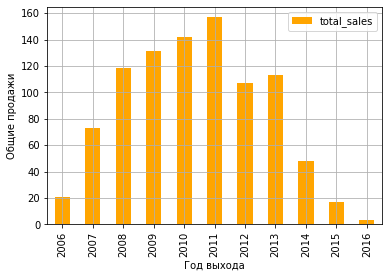

XOne


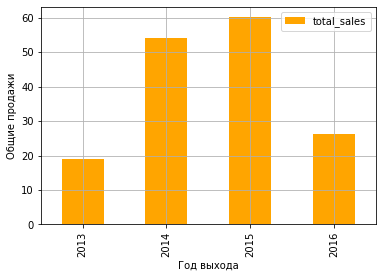

3DS


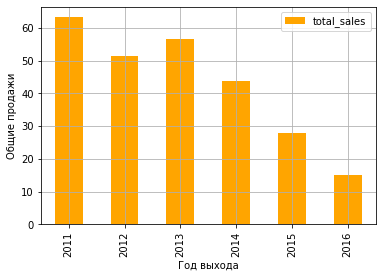

X360


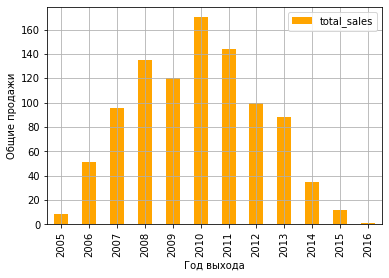

WiiU


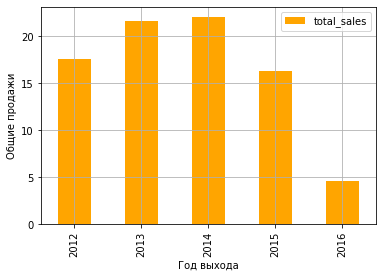

PC


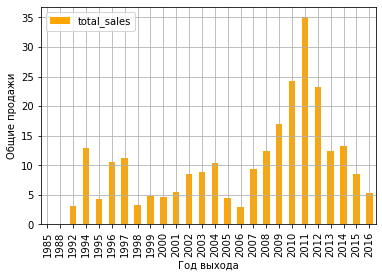

PSV


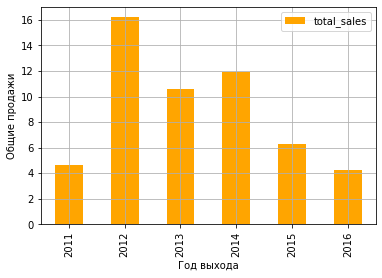

Wii


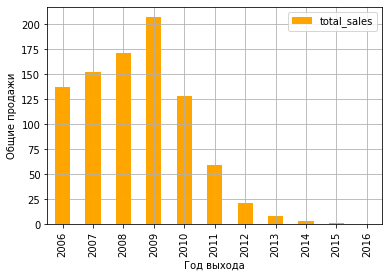

PSP


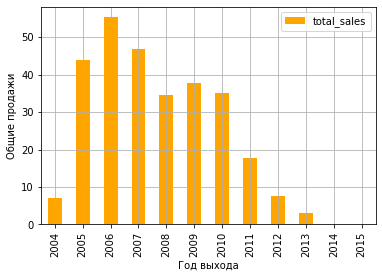

DS


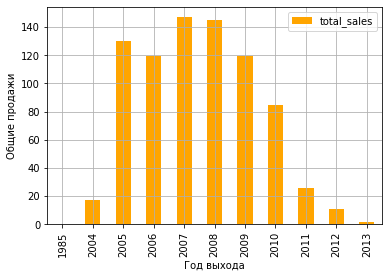

In [35]:
for platform in actual_platform_sales.index:
    print(platform)
    (data
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar', color='orange', grid=True, xlabel='Год выхода', ylabel='Общие продажи')
    )
    plt.show()

In [36]:
best_sales_platform = pd.pivot_table(actual_period_data, index='platform', 
                                     values='total_sales', aggfunc = 'sum')
best_sales_platform.sort_values('total_sales', ascending=False).head()

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80


Топ 5 платформ по миру: PS4, PS3, XOne, X360 и 3DS. Их суммарный доход за 3 года около 1 миллиарда долларов.

Продажи растут у PS4, XOne, 3DS, WiiU и PSV, так как они заменяют предыдущее поколение игровых приставок. На убыль идут приставки предыдущего поколения PS3, X360, DS, Wii и PSP соотвественно. Так же можно заметить прирост у PC.

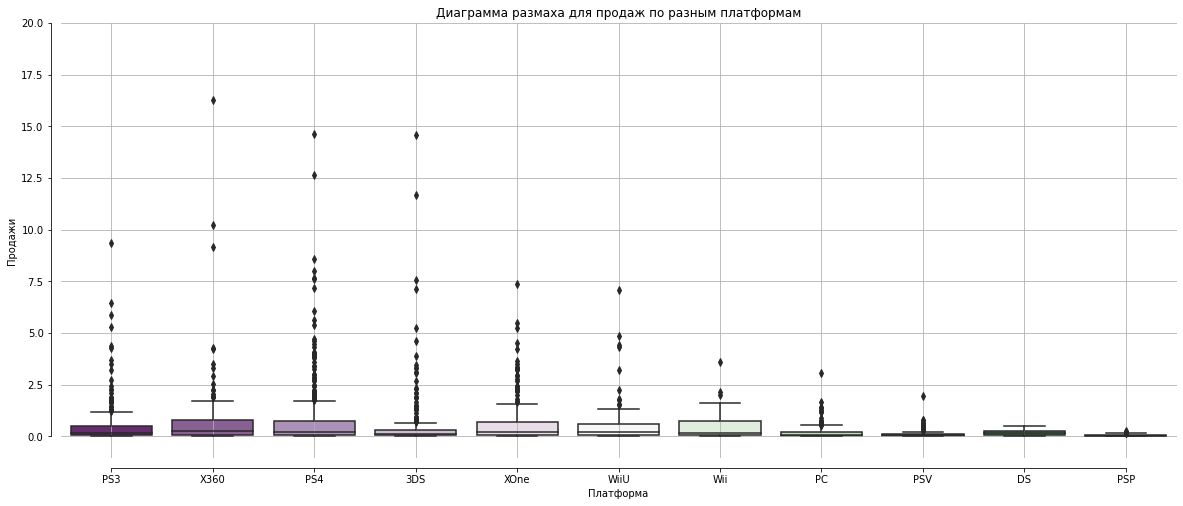

In [37]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = actual_period_data, y = 'total_sales', x='platform', palette='PRGn',)
plt.title('Диаграмма размаха для продаж по разным платформам')
plt.ylim(None, 20)
plt.ylabel('Продажи')
plt.xlabel('Платформа')
sns.despine(offset=10, trim=True)
plt.grid()
plt.show() 

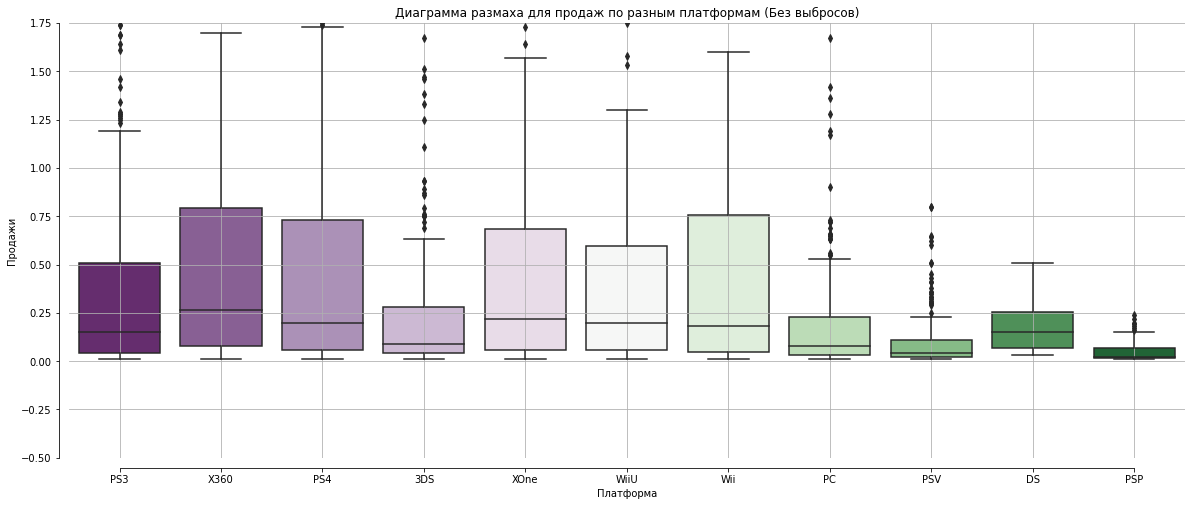

In [38]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = actual_period_data, y = 'total_sales', x='platform', palette='PRGn',)
plt.title('Диаграмма размаха для продаж по разным платформам (Без выбросов)')
plt.ylim(-0.5, 1.75)
plt.ylabel('Продажи')
plt.xlabel('Платформа')
sns.despine(offset=10, trim=True)
plt.grid()
plt.show() 


Вывод, медиана для трех топовых платформ варьируется от 0.1 до 0.25. Консоли XboxOne (на графике отмечен как 'XOne') и PS4 показывают схожую картину по медиане, и размаху. Такую же картину можно было наблюдать и ранее между PS3 и X360.

<a id="s3p7"></a>
### 3.6 Влияние отзывов пользователей и критиков на продажи популярных платформ

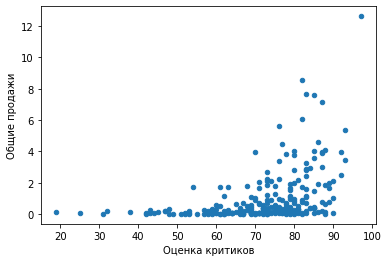

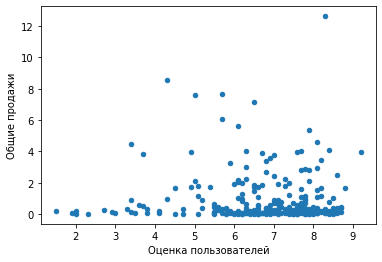

critic_score    0.406568
user_score     -0.031957
total_sales     1.000000
Name: total_sales, dtype: float64


In [39]:
games_on_platform = actual_period_data.query('platform == "PS4"')
games_on_platform.plot(kind='scatter', x='critic_score', y='total_sales', xlabel='Оценка критиков', ylabel='Общие продажи')
games_on_platform.plot(kind='scatter', x='user_score', y='total_sales', xlabel='Оценка пользователей', ylabel='Общие продажи')
plt.show()
print(games_on_platform[['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

С увеличением среднего рейтинга критиков увеличивается и средний уровень выручки с продажи игр, что логично: чем качественнее игра, тем больше денег она приносит разработчику и издателю.

Точно такая же картина и с отзывами пользователей, правда так называемых выбросов больше - когда рейтинг пользователей не велик, но тем не менее игра собирает большие деньги

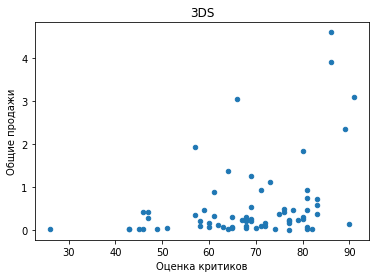

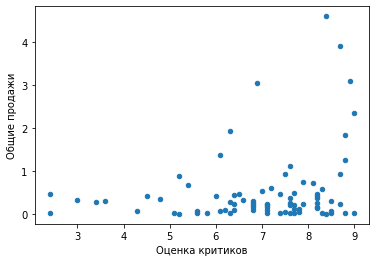

critic_score    0.357057
user_score      0.241504
total_sales     1.000000
Name: total_sales, dtype: float64


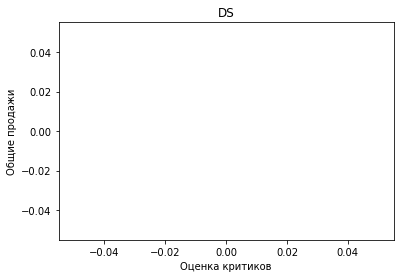

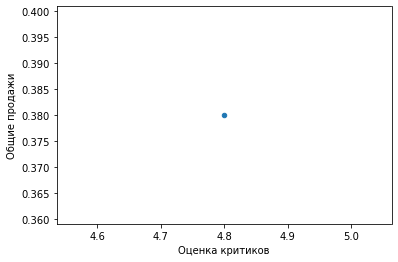

critic_score    NaN
user_score      NaN
total_sales     1.0
Name: total_sales, dtype: float64


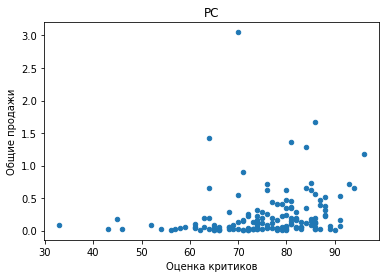

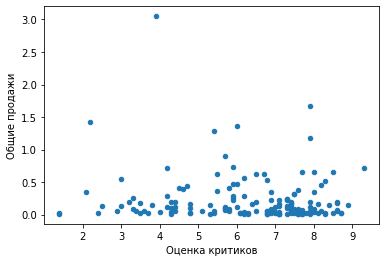

critic_score    0.196030
user_score     -0.093842
total_sales     1.000000
Name: total_sales, dtype: float64


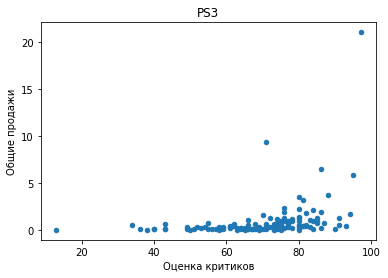

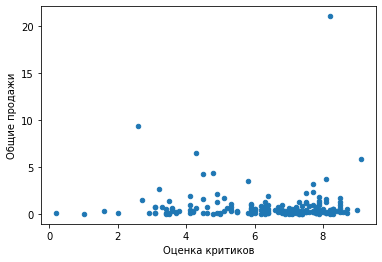

critic_score    0.334285
user_score      0.002394
total_sales     1.000000
Name: total_sales, dtype: float64


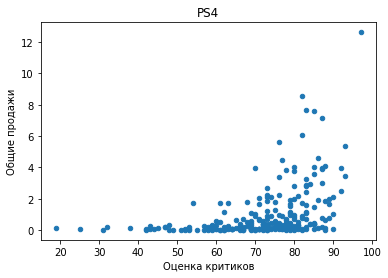

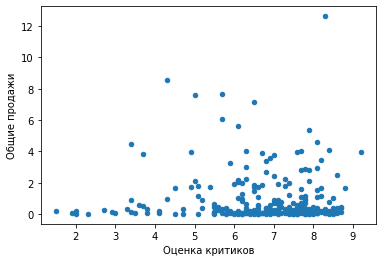

critic_score    0.406568
user_score     -0.031957
total_sales     1.000000
Name: total_sales, dtype: float64


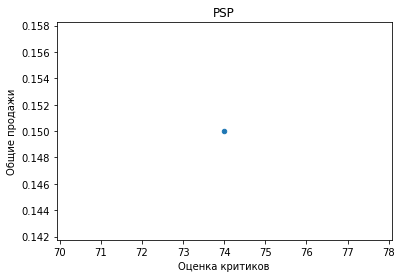

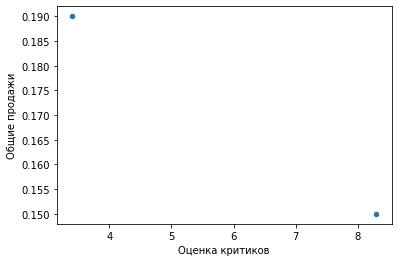

critic_score    NaN
user_score     -1.0
total_sales     1.0
Name: total_sales, dtype: float64


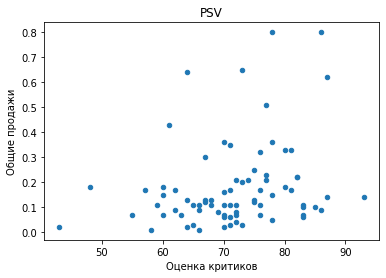

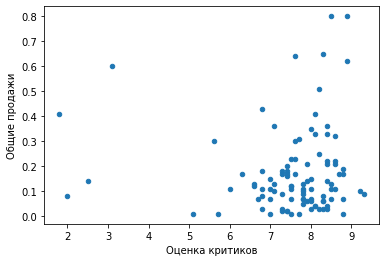

critic_score    0.254742
user_score      0.000942
total_sales     1.000000
Name: total_sales, dtype: float64


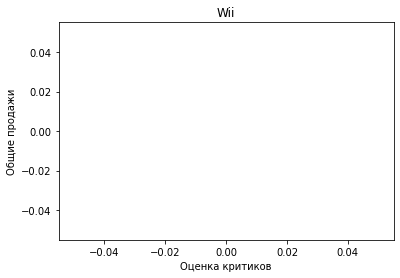

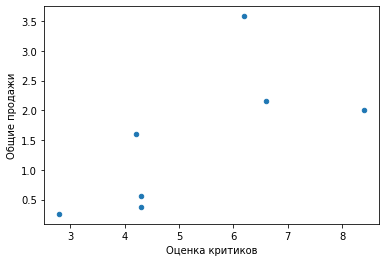

critic_score         NaN
user_score      0.682942
total_sales     1.000000
Name: total_sales, dtype: float64


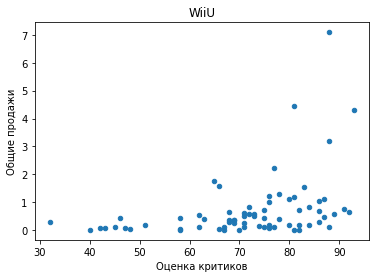

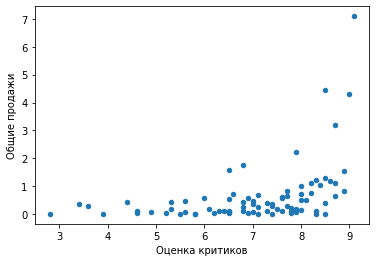

critic_score    0.376415
user_score      0.419330
total_sales     1.000000
Name: total_sales, dtype: float64


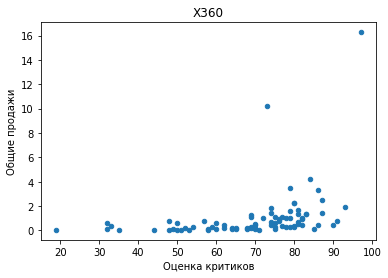

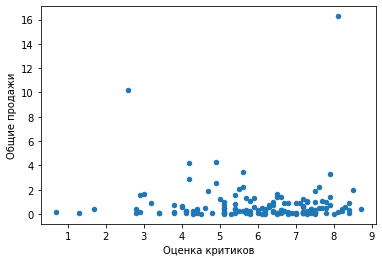

critic_score    0.350345
user_score     -0.011742
total_sales     1.000000
Name: total_sales, dtype: float64


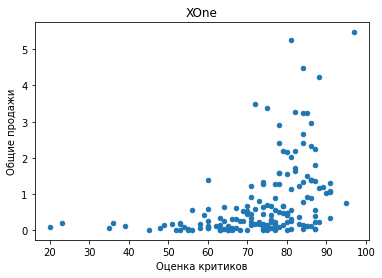

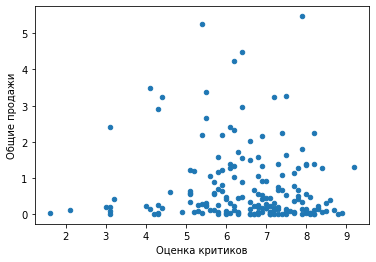

critic_score    0.416998
user_score     -0.068925
total_sales     1.000000
Name: total_sales, dtype: float64


In [40]:
for platform, games_on_platform in actual_period_data.groupby('platform'):
    print('='* 50)
    games_on_platform.plot(kind='scatter', x='critic_score', y='total_sales', title=platform, xlabel='Оценка критиков', ylabel='Общие продажи')
    games_on_platform.plot(kind='scatter', x='user_score', y='total_sales', xlabel='Оценка критиков', ylabel='Общие продажи')
    plt.show()
    print(games_on_platform[['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

Разница в продажах отличается. Имеются очень популярные игры, которые продаются годами и дают много прибыли, таковых единицы. И много игр, которые не смогли преодолеть порог в 400 тыс. долларов за выбранный период.

Период 2013-2016 год

Средняя выручка на игру по миру: 488 тыс. дол. 3/4 игр заработали до 400 тыс. Рекорд 21 млн.

Средняя выручка на игру по платформе PS4: 801 тыс. 3/4 игр заработали до 730 тыс. Рекорд 14,6 млн.

Средняя выручка на игру по платформе PS3: 526 тыс. 3/4 игр заработали до 510 тыс. Рекорд 21 млн.

Средняя выручка на игру по платформе XOne: 645 тыс. 3/4 игр заработали до 685 тыс. Рекорд 7,4 млн.

Средняя выручка на игру по платформе X360: 735 тыс. 3/4 игр заработали до 795 тыс. Рекорд 16,3 млн.

Средняя выручка на игру по платформе 3DS: 472 тыс. 3/4 игр заработали до 280 тыс. Рекорд 14,6 млн.

Для PS4, PS3 и 3DS видна положительная тенденция к росту продаж. Средняя больше 3го квантиля, это значит на эти платформы делаются более популярные и продаваемые игры, чем на XOne и X360.

<a id="s3p8"></a>
### 3.7 Какие жанры игр являются наиболее прибыльными?

In [41]:
# Комментарий ревьюера
#temp1, temp2 = top_platforms_rating_plot.total_sales.sum(), data[data['year_of_release'] >= 2011].total_sales.sum()
#temp1, temp2, round((temp2-temp1)/temp2*100, 2)

Построим график используя данные по медианным продажам игр по жанрам

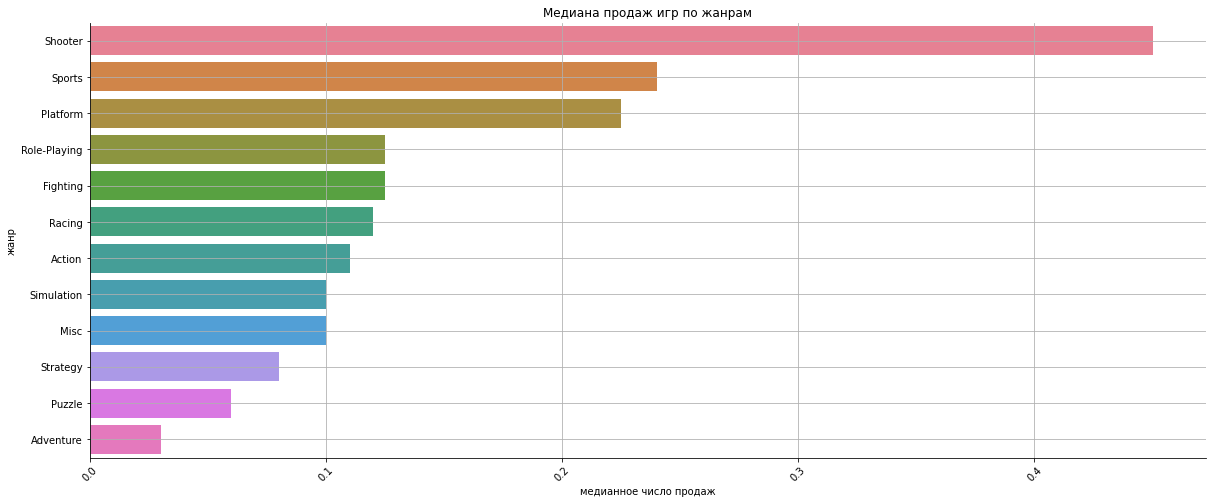

In [42]:
# сгруппируем данные по жанру
platform_genre_graph = actual_period_data.pivot_table(index='genre', values='total_sales', aggfunc='median')
platform_genre_graph.columns = ['median']

# отсортируем данные в переменной, чтобы получить более наглядный график
platform_genre_graph = platform_genre_graph.sort_values('median', ascending = False)

# построим график с помощью библиотеки seaborn
f, ax = plt.subplots(figsize = (20, 8))
ax = sns.barplot(x = 'median', y =platform_genre_graph.index, \
                 data = platform_genre_graph, \
                 orient = 'h', palette = 'husl')
plt.title('Медиана продаж игр по жанрам')
plt.ylabel('жанр')
plt.xlabel('медианное число продаж')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()

Вывод: самыми перспективными жанрами в рассматриваемый период являются Shooter, Sports и Platform.

Стоит учитывать, что с течением времени популярность жанров изменяется, и если мы будем рассматривать другой временной период, то популярность жанров может быть уже другой. 

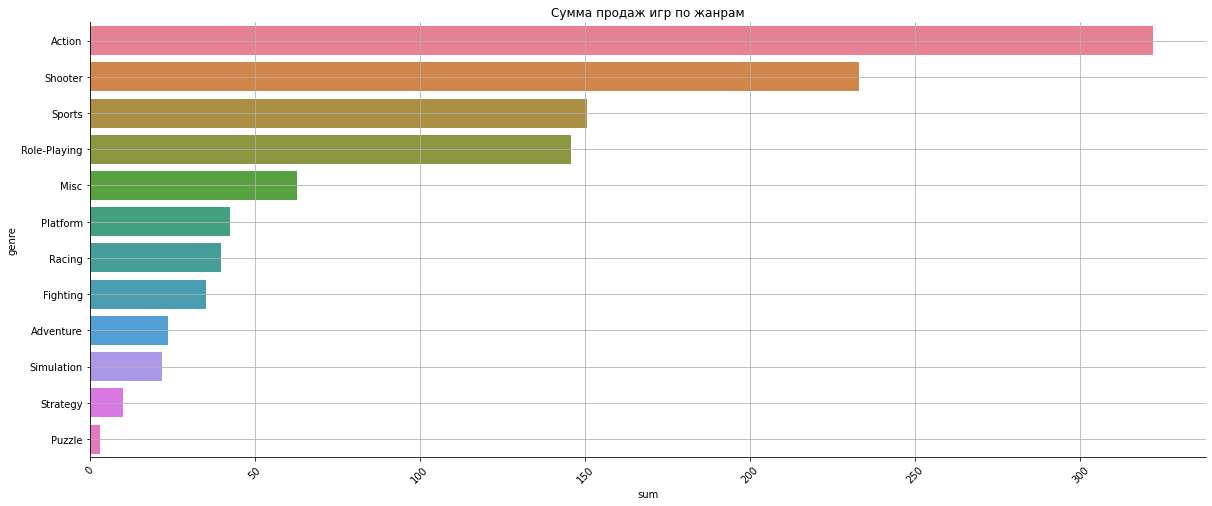

In [43]:
# сгруппируем данные по жанру
platform_genre_graph = actual_period_data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
platform_genre_graph.columns = ['sum']

# отсортируем данные в переменной, чтобы получить более наглядный график
platform_genre_graph = platform_genre_graph.sort_values('sum', ascending = False)

# построим график с помощью библиотеки seaborn
f, ax = plt.subplots(figsize = (20, 8))
ax = sns.barplot(x = 'sum', y =platform_genre_graph.index, \
                 data = platform_genre_graph, \
                 orient = 'h', palette = 'husl')
plt.title('Сумма продаж игр по жанрам')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()

Как и предполагалось. По медиане и сумме продаж по жанрам результаты разнятся:
В сумме по продажам самым популярным жанром оказался жанр Action, Shooter и Role-Playing – тут большой вклад в Action видимо сделала GTA V, ведь только по этой игре на платформе PS3 был 21 миллион продаж (+ на X360 еще 16 млн.). А жанр Puzzle по суммам продаж оказался наименее популярным.

<a id="s4p1"></a>
## Шаг 4. Портрет пользователя каждого региона

Определим портрет для пользователя каждого региона (NA, EU, JP):

1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.
2. Самые популярные жанры (топ-5). Поясните разницу.
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<a id="s4p2"></a>
### 4.1 Самые популярные платформы по регионам

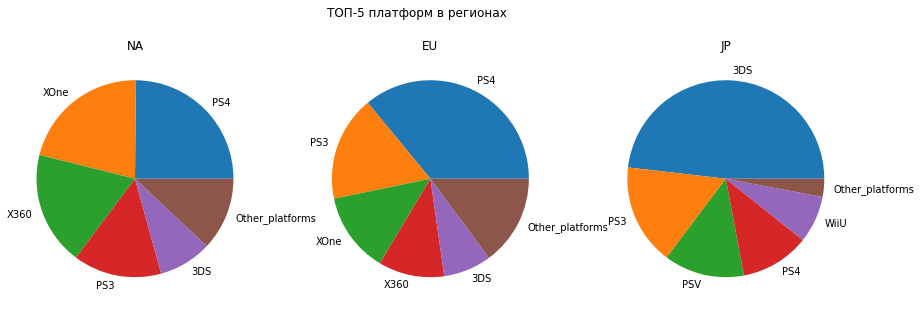

In [44]:
# задаем список регионов
countries = actual_period_data.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
  # выберем 5 самых продающих платформ
  df_i = (actual_period_data.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальные продажи в Other_platforms
  df_i = df_i.append({'platform': 'Other_platforms', \
                      countries[i]: actual_period_data[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'])

  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

**Рейтинг платформ:**

- Топ 5 по Северной Америке: PS4, XOne, X360, PS3 и 3DS
- Топ 5 по Европейскому региону: PS4, PS3, XOne, X360 и 3DS
- Топ 5 по Японии: 3DS, PS3, PSV, PS4 и WiiU

Различия по популярности платформ в первую очередь зависят от влияния фирмы. Как результат во всех рейтингах есть продукция компании Sony.

Во-вторых - местоположение компании. Популярность XOne и X360 в Америке обусловлена крупным игроком на рынке в регионе - компания Microsoft. В Японии похожее положение занимает компания Nintendo c двумя продуктами 3DS и WiiU. Европейский рынок смотрит на общую популярность платформы, так как как нет крупных компаний по разработке платформ.

На Американском рынке по продажам соревнуются PS4 и XOne. Это вечные конкуренты и компания Microsoft не хочет отставать по продажам в своем регионе. В Европе нет такой сильной конкуренции - люди выбирают лучший и популярный продукт PS4. В Японии высокая конкуренция Nintendo и Sony за пользователей. Как видно у первой компании есть успехи в родном регионе. Но плохие показатели за его пределами. В целом продажи меньше, так как в этом регионе меньше игроков.

<a id="s4p3"></a>
### 4.2 Самые популярные жанры по регионам

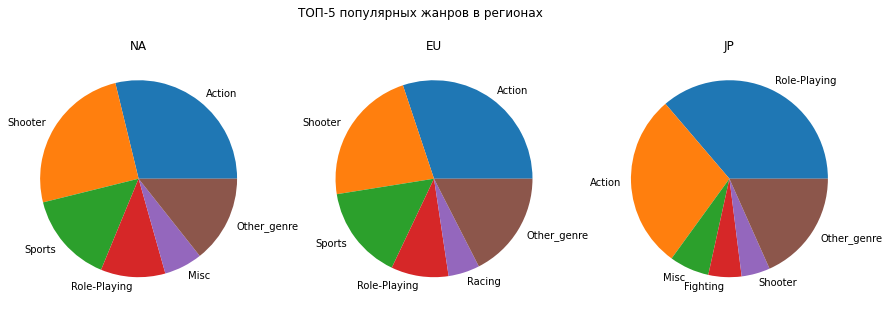

In [45]:
countries = actual_period_data.columns[4:7]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 популярных жанров в регионах')
for i in range(3):
  df_i = (actual_period_data.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  df_i = df_i.append({'genre': 'Other_genre', \
                      countries[i]: actual_period_data[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'])
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

**Рейтинг жанров:**

- Топ 5 по Северной Америке: Action, Shooter, Sports, Role-Playing и Misc
- Топ 5 по Европейскому региону: Action, Shooter, Sports, Role-Playing и Racing
- Топ 5 по Японии: Role-Playing, Action, Misc, Fighting и Shooter

Американские и европейские игроки имеют схожите тенденции по жанрам в целом. Японские отличаются от них большим вкладом в игры с глубоким смыслом. Вне зависимости от региона всегда будут популярны игры экшен, т.к. многие поколения выросли на этом жанре, и шутеры, т.к. это имитация боевых действий.

<a id="s4p4"></a>
### 4.3 Игры с каким рейтингом лидируют в регионах

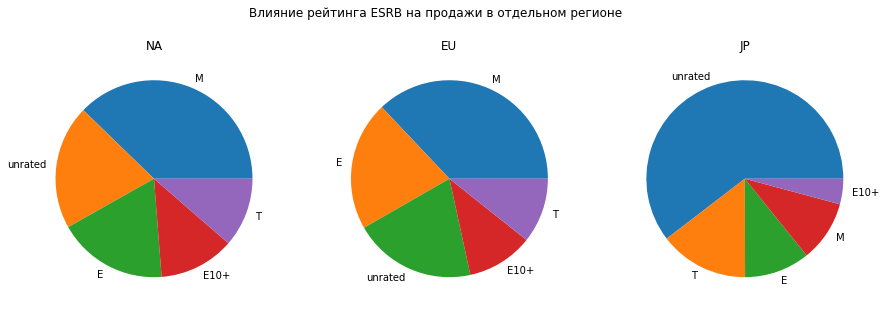

In [46]:
countries = actual_period_data.columns[4:7]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Влияние рейтинга ESRB на продажи в отдельном регионе')
for i in range(3):
  df_i = (actual_period_data.groupby('rating')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True))
            # head(5))
  axs[i].pie(df_i[countries[i]], labels = df_i['rating'])
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

Рейтинг возраста влияет по каждому региону.

В Америке и Европе схожие ситуации - в первую очередь популярны игры с возрастным рейтингом 17+. Это означает, что эти рынки ориентированы на взрослых пользователей.

В Японии лидириуют игры с возрастным рейтингом 13+. Компании хотят распространить свое влияние на новое поколение.

**Вывод**

- Американский игрок - от 17 лет, любит играть или на PS4, или на XOne, любит игры на реакцию и шутеры. 
- Европейский игрок - от 17 лет, любит играть на PS4, любит игры на реакцию и шутеры. 
- Японский игрок - от 13 лет, любит играть на переносных платформах 3DS или PSV, любит тратить время на RPG и экшены.

<a id="s5p1"></a>
## Шаг 5. Проверка гипотез

У нас есть две гипотезы, который нужно проверить:

- средние пользовательские оценки платформ XOne и PC одинаковые
- средние пользовательские оценки жанров Action и Sports разные

<a id="s5p2"></a>
### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [47]:
display(actual_period_data.query('platform in ["XOne", "PC"]').pivot_table(index='platform', values='user_score'))

,user_score
platform,
PC,6.269677
XOne,6.521429


In [48]:
xone = actual_period_data.query('platform == "XOne"').user_score.dropna().reset_index(drop=True)
pc = actual_period_data.query('platform == "PC"').user_score.dropna().reset_index(drop=True)

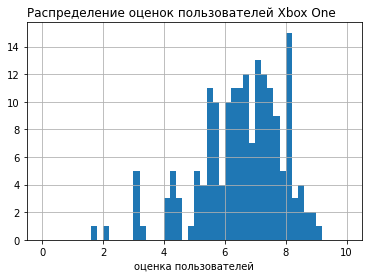

In [49]:
xone.hist(bins=50, range=(0,10))
plt.title(label='Распределение оценок пользователей Xbox One', loc='left')
plt.xlabel('оценка пользователей')
plt.show()

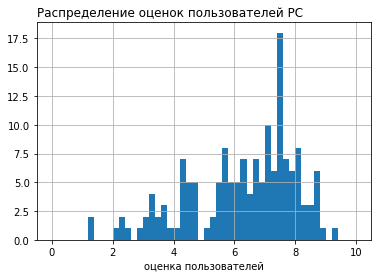

In [50]:
pc.hist(bins=50, range=(0,10))
plt.title(label='Распределение оценок пользователей PC', loc='left')
plt.xlabel('оценка пользователей')
plt.show()

Оценок игр на PC намного больше, они более сбалансированы и сгруппированы ( в промежутке от 7 до 9 баллов), и, глядя на графики, кажется, что оценки различаются. Давайте это проверим.

Введем основную и альтернативные гипотезы:

Для проверки первой гипотезы мы примем за нулевую гипотезу то, что средние пользовательские оценки платформ XOne и PC равны. Так как гипотеза односторонняя (нам не важно, больше они или меньше, важно лишь равны или нет), то альтернативная гипотеза будет то, что эти оценки не равны.
Для проверки нулевой гипотезы будем использовать t-тест Стъюдента для независимых совокупностей и считать гипотезу отвергнутой при p-value менее 0.01.

**Сформулируем гипотезы:**

* H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

Уровень значимости установим 0.05

In [51]:
alpha = 0.01 #критическое значение p-value
result = st.ttest_ind(
    actual_period_data.loc[~(actual_period_data['user_score'].isna()) & (actual_period_data['platform']=='PC'), 'user_score'],
    actual_period_data.loc[~(actual_period_data['user_score'].isna()) & (actual_period_data['platform']=='XOne'), 'user_score'],
    equal_var=False #так как дисперсии не равны
) 

print('Значение p-value:', result.pvalue)

Значение p-value: 0.14759594013430463


In [52]:
#проверяем гипотезу
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')   

Не получилось отвергнуть нулевую гипотезу


In [53]:
#посмотрим математически на средние двух платформ
print('Средняя пользовательская оценка игр на PC', actual_period_data.loc[~(actual_period_data['user_score'].isna()) & (actual_period_data['platform']=='PC'), 'user_score'].mean())
print('Средняя пользовательская оценка игр на XOne', actual_period_data.loc[~(actual_period_data['user_score'].isna()) & (actual_period_data['platform']=='XOne'), 'user_score'].mean())

Средняя пользовательская оценка игр на PC 6.2696774193548395
Средняя пользовательская оценка игр на XOne 6.521428571428572


**Вывод:**

Гипотеза о том, что средние оценки пользователей платформ PC и XOne равны, подтвердилась. То есть пользовательский рейтинг игр на обе эти платформы примерно одинаков, однако XOne остается популярной и востребованной платформой, а вот ПК к 2016 году имеет низкие продажи и не рассматривается как потенциально прибыльная платформа. Не всегда игры, имеющие высокие оценки игроков, хорошо продаются и являются потенциально прибыльными.
Такой результат можем быть связан с тем, что некоторые игры созданы для любителей контретного жанра или истории, они получаютв высокие оценки от своих игроков, однако, не выходят широко на рынок и не являются популярными.

<a id="s5p3"></a>
### 5.2 Средние пользовательские рейтинги жанров Action и Sports разные

In [54]:
display(actual_period_data.query('genre in ["Action", "Sports"]').pivot_table(index='genre', values='user_score'))

,user_score
genre,
Action,6.837532
Sports,5.238125


In [55]:
action = actual_period_data.query('genre == "Action"').user_score.dropna().reset_index(drop=True)
sports = actual_period_data.query('genre == "Sports"').user_score.dropna().reset_index(drop=True)

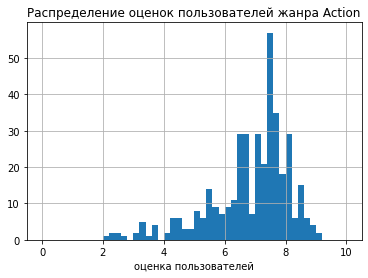

In [56]:
action.hist(bins=50, range=(0,10))
plt.title(label='Распределение оценок пользователей жанра Action', loc='left')
plt.xlabel('оценка пользователей')
plt.show()

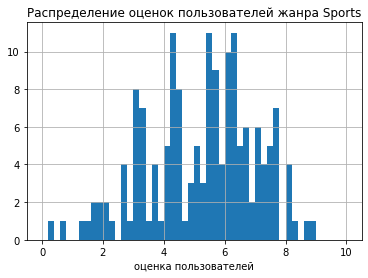

In [57]:
sports.hist(bins=50, range=(0,10))
plt.title(label='Распределение оценок пользователей жанра Sports', loc='left')
plt.xlabel('оценка пользователей')
plt.show()

Вторая гипотеза звучит так: средние оценки пользователей жанров Экшен и Спорт разные. Однако нулевая гипотеза будет обратной - средние оценки игр Экшен и Спорт равны. Гипотеза тоже будет двухсторонняя, так как не важно, какая оценка выше, какая ниже, нам важно лишь наличие разницы.
И снова мы имеем дело с двумя независимыми совокупностями и будем проверять с помощью t-теста Стъюдента.
Если p-value будет меньше выбранного уровня значимости 
, то нулевую гипотезу о равенстве средних отвергнем. В противном случае делаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

**Сформулируем гипотезы:**

* H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
* H1: Средние пользовательские рейтинги жанров Action и Sports различаются

In [58]:
alpha = 0.01 #критическое значение p-value
result = st.ttest_ind(
    actual_period_data.loc[~(actual_period_data['user_score'].isna()) & (actual_period_data['genre']=='Action'), 'user_score'],
    actual_period_data.loc[~(actual_period_data['user_score'].isna()) & (actual_period_data['genre']=='Sports'), 'user_score'],
    equal_var=False
) 


In [59]:
#проверяем гипотезу
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')  

Отвергаем нулевую гипотезу


In [60]:
#посмотрим математически на средние жанров
print('Средняя пользовательская оценка игр жанра Экшен', actual_period_data.loc[~(actual_period_data['user_score'].isna()) & (actual_period_data['genre']=='Action'), 'user_score'].mean())
print('Средняя пользовательская оценка игр жанра Спорт', actual_period_data.loc[~(actual_period_data['user_score'].isna()) & (actual_period_data['genre']=='Sports'), 'user_score'].mean())


Средняя пользовательская оценка игр жанра Экшен 6.837532133676092
Средняя пользовательская оценка игр жанра Спорт 5.238124999999999


**Вывод:**

Гипотеза о том, что пользовательские оценки жанров Экшен и Спорт различны - подтвердилась. Мы обнаружили, что средний рейтинг игроков игр в жанре Экшен выше, чем у игр жанра Спорт. Экшены и более распространены, за 4 года выпускалось бОльшее количество игр. Хотя следует обратить внимание, что при этом игры жанра Спорт обгоняют Экшены по количеству продаж во всем мире за эти 4 года, то есть являются более популярными и прибыльными. Что еще раз указывает нам на то, что пользовательский рейтинг не влияет на количество продаж и при планировании рекламных кампаний на него ориентироваться не стоит.

Первая и вторая гипотезы подтвердились.

Платформа XOne старается из года в год набирать новых пользователей, чтобы соревноваться не только с PS4, но и с самой распространненной платформой на земле PC. На 2016 год по качеству игр они близки к компьютерным.

Различия между Action и Sports существуют из-за опыта создания игр. Первые экшены появились в 80х годах и из года в год они становятся интересней, так как им есть на что ровняться в прошлом. У спортивных игр в большинстве случаев ограничением в рейтингах стоит симуляция реальных спортивных игр. И любителям этой серии иногда приходиться сталкиваться с непонятными решениями в этих играх.

<a id="s6p1"></a>
## Шаг 6: Общий вывод

В ходе проделанной работы было выполнено:

1. В ходе предобработки данных было выявлено множество прпоусков. Удалены две игры с неизвестными названием и жанром 90х годов, также исключены некоторые игры с неизвестным годом выпуска и отсутствием оценок. Ряд пропусков решено оставить, часть из них можно объяснить отсутсвием рейтинга в виду старости игры или особенностями оценки возрастных ограничений для разных стран. Однако стоит обратить внимание на такое количество пропусков, возможно, это техническая ошибка при выгрузке данных.
2. В ходе исследования был определен средний жизненный цикл платформы - 7 лет. Более старые платформы теряют популярность и не стоит делать на них акценты во время проведения рекламной кампании. Так было выделены следующие перспективные платформы:
    - PS4
    - XOne
    - WiiU
    - 3DS для Японии
    
Следует обратить внимание на различие предпочтений у разных регионов: так в Северной Америке наиболее популярными являются платформы от Xbox, на втором месте PS. В Европе PS и Xbox с преобладанием первых. А вот в Японии весь топ-5 платформ занимают японские консоли, в том числе портативные, 3DS при этом является абсолютным лидером по популярности у японских пользователей. Следует это учитывать при планировании рекламы на 2017 год и делать акценты на игры для определенных платформ в определенных регионах.

3. Наиболее распространенными по количеству выпускаемых игр оказались жанры Экшен, РПГ и Приключения. При этом по количеству продаж жанра Приключения не оказалось ни в одной пятерке лидеров по разным регионам. В статистике по миру Приключения занимают последнее место по прибыльности. На это тоже стоит обратить внимание при проведении рекламы - не всегда широко распространенные игры являются прибыльными и популярными. Лидерами по продажам в мире стали игры жанра Шутеры, Спорт и Платформы. При этом снова есть некоторые различия по регионам, что необходимо учитывать: в Северной Америке и Европе самый популярный по продажам жанр Экшен, также вошли Шутеры, Спорт и РПГ, что, в принципе, соответсвует мировому рейтингу с некоторыми особенностями. А вот в Японии картинка немного другая: абсолютными лидерами там являются игры жанра РПГ, также в лидеры вошли Экшен и Аркады, а вот Шутеры здесь менее популярны, это стоит учитывать при планировании рекламы на японский рынок, а также обязательно помнить про любовь японцев к портативным консолям.
4. В ходе исследования было также изучено влияние рейтинга ESRB на количество продаж. И обнаружено, что в Северной Америке и Европе предпочитают игры, доступные от 17 лет (M). А вот в Японии отдают предпочтение играм, которые доступны уже с 13 лет (T), и игры категории E - для любого возраста - в Японии более популярны, чем в других странах. При этом игры от 10 лет (E10+) имеют самые низкие продажи во всех регионах.

Таким образом стоит учесть все особенности при проведении рекламы в различным регионах. Северная Америка: платформы XOne в большей степени и PS4, игры категории M жанров Экшен, Шутеры, Спорт, РПГ. В Европе: так же игры от 17 лет в жанрах Экшен, Шутеры, Спорти РПГ, только уже бОльший акцент на PS4, а затем XOne. А вот в Японии - портативные консоли от Nintendo (3DS, WiiU), консоли от PS, игры, которые дсотупны с более младшего возраста - 13 лет - в жанрах РПГ, Аркады, Экшен.

5. Было изучено влияние оценок критиков и пользователей на количество продаж. Установлено, что оценки критиков в большей степени влияют на продажи игр - чем выше оценка, тем выше количество продаж. А вот пользовательский рейтинг, напротив, не определяет популярность. Так, например, установлено, что средний пользовательский рейтинг у игр на ПК и XOne одинаков, однако ПК к 2016 году имеет совсем низкие продажи и не является перспективной платформой, в отличие от XOne. Также было установлено, что игроки более высоко оценивают игры жанра Экшен, чем Спорт, хотя суммарные мировые продажи у Экшенов ниже. Поэтому при планировании рекламной компании не стоит ориентироваться на пользовательский рейтинг, учитывать только оценку критиков.

**вывод** - Для продаж в Северной Америке и Европе следует ориентироваться на платформы PS4 и XOne и такие жанры игр как экшены, шутеры и спортивные симуляторы.

Для продаж в Японии следует ориентироваться на платформу 3DS и такие жанры как ролевые игры и экшены.

В то же время внимание больше всё же стоит сконцентрировать на Северной Америке и Европе, там емкость рынка намного выше, чем в Японии.